In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [324]:
df_in= pd.read_csv("Train_In.csv")
df_out= pd.read_csv("Train_Out.csv")
df_testin= pd.read_csv("Test_In.csv")
df_testout= pd.read_csv("Test_Out.csv")

In [325]:
df_in.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)

In [326]:
total_df = pd.concat([df_in, df_out], axis=0)

In [327]:
total_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,6186,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,29590,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,78321,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [328]:
total_df=total_df.dropna(subset=['AttendingPhysician'])

In [313]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556703 entries, 0 to 517736
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  556703 non-null  object 
 1   ClaimID                 556703 non-null  object 
 2   ClaimStartDt            556703 non-null  object 
 3   ClaimEndDt              556703 non-null  object 
 4   Provider                556703 non-null  object 
 5   InscClaimAmtReimbursed  556703 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114433 non-null  object 
 8   OtherPhysician          199723 non-null  object 
 9   ClmAdmitDiagnosisCode   145081 non-null  object 
 10  DeductibleAmtPaid       555813 non-null  float64
 11  DiagnosisGroupCode      40362 non-null   object 
 12  ClmDiagnosisCode_1      546287 non-null  object 
 13  ClmDiagnosisCode_2      361675 non-null  object 
 14  ClmDiagnosisCode_3      2

In [329]:
total_df['AttendingPhysician'] = total_df['AttendingPhysician'].fillna('0')
total_df['AttendingPhysician'] = total_df['AttendingPhysician'].astype(str)

C:\Users\hp\AppData\Local\Temp\ipykernel_13300\2276749493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['AttendingPhysician'] = total_df['AttendingPhysician'].fillna('0')
C:\Users\hp\AppData\Local\Temp\ipykernel_13300\2276749493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['AttendingPhysician'] = total_df['AttendingPhysician'].astype(str)


In [330]:
total_df['ClaimID_numeric'] = total_df['ClaimID'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_df['Physician_numeric'] = total_df['AttendingPhysician'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_df['Provider_numeric'] = total_df['Provider'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_df['BeneID_numeric'] = total_df['BeneID'].apply(lambda x: int(re.sub('[^0-9]', '', x)))

C:\Users\hp\AppData\Local\Temp\ipykernel_13300\1163955740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['ClaimID_numeric'] = total_df['ClaimID'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
C:\Users\hp\AppData\Local\Temp\ipykernel_13300\1163955740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df['Physician_numeric'] = total_df['AttendingPhysician'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
C:\Users\hp\AppData\Local\Temp\ipykernel_13300\1163955740.py:3: SettingWithCopyWarning:

In [316]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556703 entries, 0 to 517736
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  556703 non-null  object 
 1   ClaimID                 556703 non-null  object 
 2   ClaimStartDt            556703 non-null  object 
 3   ClaimEndDt              556703 non-null  object 
 4   Provider                556703 non-null  object 
 5   InscClaimAmtReimbursed  556703 non-null  int64  
 6   AttendingPhysician      556703 non-null  object 
 7   OperatingPhysician      114433 non-null  object 
 8   OtherPhysician          199723 non-null  object 
 9   ClmAdmitDiagnosisCode   145081 non-null  object 
 10  DeductibleAmtPaid       555813 non-null  float64
 11  DiagnosisGroupCode      40362 non-null   object 
 12  ClmDiagnosisCode_1      546287 non-null  object 
 13  ClmDiagnosisCode_2      361675 non-null  object 
 14  ClmDiagnosisCode_3      2

In [331]:
columns_to_fill = ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']
total_df[columns_to_fill] = total_df[columns_to_fill].fillna(0)

C:\Users\hp\AppData\Local\Temp\ipykernel_13300\2358178563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_df[columns_to_fill] = total_df[columns_to_fill].fillna(0)


In [332]:
total_df.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician             0
OperatingPhysician        442270
OtherPhysician            356980
ClmAdmitDiagnosisCode          0
DeductibleAmtPaid            890
DiagnosisGroupCode             0
ClmDiagnosisCode_1         10416
ClmDiagnosisCode_2        195028
ClmDiagnosisCode_3        314265
ClmDiagnosisCode_4        392592
ClmDiagnosisCode_5        445053
ClmDiagnosisCode_6        472511
ClmDiagnosisCode_7        490684
ClmDiagnosisCode_8        503387
ClmDiagnosisCode_9        514975
ClmDiagnosisCode_10       551694
ClmProcedureCode_1        533447
ClmProcedureCode_2        551223
ClmProcedureCode_3        555735
ClmProcedureCode_4        556585
ClmProcedureCode_5        556694
ClmProcedureCode_6        556703
ClaimID_numeric                0
Physician_numeric              0
Provider_n

In [333]:
def check_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Apply the check_numeric function to identify non-numeric values
numeric_mask = total_df['ClmAdmitDiagnosisCode'].apply(check_numeric)

# Filter out rows with non-numeric values
total_df = total_df[numeric_mask]

# Convert the column to int64
total_df['ClmAdmitDiagnosisCode'] = total_df['ClmAdmitDiagnosisCode'].astype('int64')


In [335]:
def check_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Apply the check_numeric function to identify non-numeric values
numeric_mask = total_df['DiagnosisGroupCode'].apply(check_numeric)

# Filter out rows with non-numeric values
total_df = total_df[numeric_mask]

# Convert the column to int64
total_df['DiagnosisGroupCode'] = total_df['DiagnosisGroupCode'].astype('int64')


In [336]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536728 entries, 0 to 517736
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  536728 non-null  object 
 1   ClaimID                 536728 non-null  object 
 2   ClaimStartDt            536728 non-null  object 
 3   ClaimEndDt              536728 non-null  object 
 4   Provider                536728 non-null  object 
 5   InscClaimAmtReimbursed  536728 non-null  int64  
 6   AttendingPhysician      536728 non-null  object 
 7   OperatingPhysician      111133 non-null  object 
 8   OtherPhysician          197469 non-null  object 
 9   ClmAdmitDiagnosisCode   536728 non-null  int64  
 10  DeductibleAmtPaid       535869 non-null  float64
 11  DiagnosisGroupCode      536728 non-null  int64  
 12  ClmDiagnosisCode_1      526938 non-null  object 
 13  ClmDiagnosisCode_2      349495 non-null  object 
 14  ClmDiagnosisCode_3      2

In [337]:
selected_columns=['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']

In [338]:
def enumerate_values(total_df, selected_columns):
    value_to_int = {}
    for col in selected_columns:
        unique_values = total_df[col].unique()
        for value in unique_values:
            if pd.notnull(value) and value not in value_to_int:
                value_to_int[value] = len(value_to_int) + 1
    value_to_int[np.nan] = 0  # Assigning 0 to NaN

    for col in selected_columns:
        total_df[col] = total_df[col].map(value_to_int)
 
    return total_df

# Assuming you have defined total_df and selected_columns somewhere before calling the function
total_df = enumerate_values(total_df, selected_columns)


In [339]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536728 entries, 0 to 517736
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  536728 non-null  object 
 1   ClaimID                 536728 non-null  object 
 2   ClaimStartDt            536728 non-null  object 
 3   ClaimEndDt              536728 non-null  object 
 4   Provider                536728 non-null  object 
 5   InscClaimAmtReimbursed  536728 non-null  int64  
 6   AttendingPhysician      536728 non-null  object 
 7   OperatingPhysician      111133 non-null  object 
 8   OtherPhysician          197469 non-null  object 
 9   ClmAdmitDiagnosisCode   536728 non-null  int64  
 10  DeductibleAmtPaid       535869 non-null  float64
 11  DiagnosisGroupCode      536728 non-null  int64  
 12  ClmDiagnosisCode_1      536728 non-null  int64  
 13  ClmDiagnosisCode_2      536728 non-null  int64  
 14  ClmDiagnosisCode_3      5

In [340]:

# Assuming df is your DataFrame containing the dataset
# Define weights for procedure codes and diagnosis codes
procedure_code_weights = {
    'ClmProcedureCode_1': 0.2,
    'ClmProcedureCode_2': 0.15,
    'ClmProcedureCode_3': 0.1,
    'ClmProcedureCode_4': 0.05,
    'ClmProcedureCode_5': 0.03,
    'ClmProcedureCode_6': 0.02  # Assuming the sum of weights for procedures is 1
}

diagnosis_code_weights = {
    'ClmDiagnosisCode_1': 0.2,
    'ClmDiagnosisCode_2': 0.15,
    'ClmDiagnosisCode_3': 0.1,
    'ClmDiagnosisCode_4': 0.08,
    'ClmDiagnosisCode_5': 0.06,
    'ClmDiagnosisCode_6': 0.05,
    'ClmDiagnosisCode_7': 0.04,
    'ClmDiagnosisCode_8': 0.03,
    'ClmDiagnosisCode_9': 0.02,
    'ClmDiagnosisCode_10': 0.01  # Assuming the sum of weights for diagnoses is 1
}

# Calculate weighted sum for procedure codes
def calculate_weighted_procedure(row):
    weighted_sum = 0
    for col, weight in procedure_code_weights.items():
        if not pd.isnull(row[col]):
            weighted_sum += row[col] * weight
    return weighted_sum

# Calculate weighted sum for diagnosis codes
def calculate_weighted_diagnosis(row):
    weighted_sum = 0
    for col, weight in diagnosis_code_weights.items():
        if not pd.isnull(row[col]):
            weighted_sum += row[col] * weight
    return weighted_sum

# Apply the functions to create the weighted columns
total_df['Weighted_Procedure_Codes'] = total_df.apply(calculate_weighted_procedure, axis=1)
total_df['Weighted_Diagnosis_Codes'] = total_df.apply(calculate_weighted_diagnosis, axis=1)

# Now df['Weighted_Procedure_Codes'] contains the weighted sum for procedure codes
# and df['Weighted_Diagnosis_Codes'] contains the weighted sum for diagnosis codes


In [341]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536728 entries, 0 to 517736
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BeneID                    536728 non-null  object 
 1   ClaimID                   536728 non-null  object 
 2   ClaimStartDt              536728 non-null  object 
 3   ClaimEndDt                536728 non-null  object 
 4   Provider                  536728 non-null  object 
 5   InscClaimAmtReimbursed    536728 non-null  int64  
 6   AttendingPhysician        536728 non-null  object 
 7   OperatingPhysician        111133 non-null  object 
 8   OtherPhysician            197469 non-null  object 
 9   ClmAdmitDiagnosisCode     536728 non-null  int64  
 10  DeductibleAmtPaid         535869 non-null  float64
 11  DiagnosisGroupCode        536728 non-null  int64  
 12  ClmDiagnosisCode_1        536728 non-null  int64  
 13  ClmDiagnosisCode_2        536728 non-null  int64 

In [342]:
# Remove columns with IDs and dates
total_df = total_df.select_dtypes(include=['number'])
total_df = total_df.drop('DeductibleAmtPaid', axis=1)
total_df = total_df.drop('ClmProcedureCode_6', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_5', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_6', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_7', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_8', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_9', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_10', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_4', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_3', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_2', axis=1)
total_df = total_df.drop('ClmDiagnosisCode_1', axis=1)
total_df = total_df.drop('ClmProcedureCode_1', axis=1)
total_df = total_df.drop('ClmProcedureCode_2', axis=1)
total_df = total_df.drop('ClmProcedureCode_3', axis=1)
total_df = total_df.drop('ClmProcedureCode_4', axis=1)
total_df = total_df.drop('ClmProcedureCode_5', axis=1)
# Create a correlation matrix for numeric columns
correlation_matrix = total_df.corr()

# Print the correlation matrix
matrix=correlation_matrix
matrix

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClaimID_numeric,Physician_numeric,Provider_numeric,BeneID_numeric,Weighted_Procedure_Codes,Weighted_Diagnosis_Codes
InscClaimAmtReimbursed,1.000000,0.279438,0.558078,-0.319491,0.011736,-0.011600,-0.000552,0.645503,-0.013291
ClmAdmitDiagnosisCode,0.279438,1.000000,0.344439,-0.271868,0.004421,-0.008314,0.001203,0.307328,0.021408
DiagnosisGroupCode,0.558078,0.344439,1.000000,-0.407544,0.013850,-0.016121,0.000238,0.602553,-0.010387
ClaimID_numeric,-0.319491,-0.271868,-0.407544,1.000000,-0.008333,0.010271,0.002142,-0.340579,0.023020
Physician_numeric,0.011736,0.004421,0.013850,-0.008333,1.000000,0.006165,0.000692,0.012189,-0.001352
Provider_numeric,-0.011600,-0.008314,-0.016121,0.010271,0.006165,1.000000,-0.000491,-0.013117,-0.001172
BeneID_numeric,-0.000552,0.001203,0.000238,0.002142,0.000692,-0.000491,1.000000,0.000172,0.010313
Weighted_Procedure_Codes,0.645503,0.307328,0.602553,-0.340579,0.012189,-0.013117,0.000172,1.000000,-0.015734
Weighted_Diagnosis_Codes,-0.013291,0.021408,-0.010387,0.023020,-0.001352,-0.001172,0.010313,-0.015734,1.000000


<Axes: >

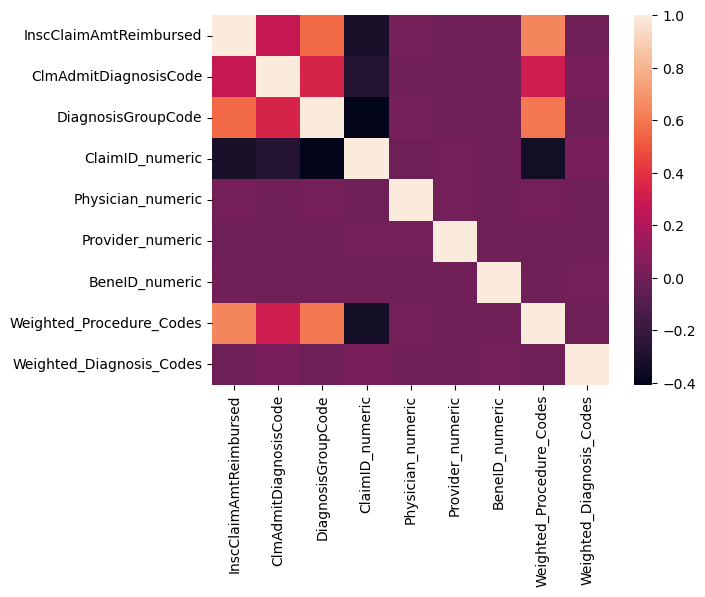

In [343]:
sns.heatmap(matrix)

In [89]:
columns_to_keep = ['InscClaimAmtReimbursed','ClmAdmitDiagnosisCode','DiagnosisGroupCode','Physician_numeric','Provider_numeric','BeneID_numeric','Weighted_Procedure_Codes','Weighted_Diagnosis_Codes']
new_df = total_df.loc[:, columns_to_keep]
new_df.head()

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Physician_numeric,Provider_numeric,BeneID_numeric,Weighted_Procedure_Codes,Weighted_Diagnosis_Codes
0,26000,1,4094,390922,55912,11001,0.0,708.40
1,5000,2,4095,318495,55907,11001,2341.4,50.15
2,5000,3,4096,372395,56046,11001,0.0,473.04
3,5000,4,4097,369659,52405,11011,2341.6,612.31
4,10000,5,4098,379376,56614,11014,2341.8,598.20


In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556703 entries, 0 to 517736
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   InscClaimAmtReimbursed    556703 non-null  int64  
 1   ClmAdmitDiagnosisCode     556703 non-null  int64  
 2   DiagnosisGroupCode        556703 non-null  int64  
 3   Physician_numeric         556703 non-null  int64  
 4   Provider_numeric          556703 non-null  int64  
 5   BeneID_numeric            556703 non-null  int64  
 6   Weighted_Procedure_Codes  556703 non-null  float64
 7   Weighted_Diagnosis_Codes  556703 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 38.2 MB


In [344]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming final_df is your DataFrame
X = total_df.drop('InscClaimAmtReimbursed', axis=1)
X = total_df.drop('ClaimID_numeric', axis=1)

y = total_df['InscClaimAmtReimbursed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 936462.171980812
R^2 Score: 0.9330138658588571


In [99]:
X

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DiagnosisGroupCode,Physician_numeric,Provider_numeric,BeneID_numeric,Weighted_Procedure_Codes,Weighted_Diagnosis_Codes
0,26000,1,4094,390922,55912,11001,0.0,708.40
1,5000,2,4095,318495,55907,11001,2341.4,50.15
2,5000,3,4096,372395,56046,11001,0.0,473.04
3,5000,4,4097,369659,52405,11011,2341.6,612.31
4,10000,5,4098,379376,56614,11014,2341.8,598.20
...,...,...,...,...,...,...,...,...
517732,800,0,0,364188,53699,159198,0.0,1515.55
517733,400,0,0,423019,53702,159198,0.0,1957.00
517734,60,0,0,361063,53676,159198,0.0,495.05
517735,70,0,0,403198,53689,159198,0.0,0.00


# TEST

In [348]:
df_testin= pd.read_csv("Test_In.csv")
df_testout= pd.read_csv("Test_Out.csv")

In [349]:
df_testin.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)

In [350]:
total_test = pd.concat([df_testin, df_testout], axis=0)

In [351]:
total_test=total_test.dropna(subset=['AttendingPhysician'])

In [352]:
total_test['AttendingPhysician'] = total_test['AttendingPhysician'].fillna('0')
total_test['AttendingPhysician'] = total_test['AttendingPhysician'].astype(str)

In [353]:
total_test['ClaimID_numeric'] = total_test['ClaimID'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_test['Physician_numeric'] = total_test['AttendingPhysician'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_test['Provider_numeric'] = total_test['Provider'].apply(lambda x: int(re.sub('[^0-9]', '', x)))
total_test['BeneID_numeric'] = total_test['BeneID'].apply(lambda x: int(re.sub('[^0-9]', '', x)))

In [354]:
total_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimID_numeric,Physician_numeric,Provider_numeric,BeneID_numeric
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,5789,...,4443.0,5849.0,NaN,NaN,NaN,NaN,67387,317786,57070,11014
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,5939,...,5551.0,NaN,NaN,NaN,NaN,NaN,31237,314656,54750,11017
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,4019,...,NaN,NaN,NaN,NaN,NaN,NaN,78930,349495,53758,11026
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,8208,...,8152.0,3320.0,NaN,NaN,NaN,NaN,56810,429538,55825,11031
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,4279,...,NaN,NaN,NaN,NaN,NaN,NaN,34625,397161,52338,11085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,469576,431265,55485,159193
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,483842,369098,55485,159193
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,92420,...,NaN,NaN,NaN,NaN,NaN,NaN,554925,431298,55485,159193
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,347777,406767,55889,159194


In [356]:
columns_to_fill = ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode']
total_test[columns_to_fill] = total_test[columns_to_fill].fillna(0)

C:\Users\hp\AppData\Local\Temp\ipykernel_13300\1759108912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_test[columns_to_fill] = total_test[columns_to_fill].fillna(0)


In [357]:
def check_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Apply the check_numeric function to identify non-numeric values
numeric_mask = total_test['ClmAdmitDiagnosisCode'].apply(check_numeric)

# Filter out rows with non-numeric values
total_test = total_test[numeric_mask]

# Convert the column to int64
total_test['ClmAdmitDiagnosisCode'] = total_test['ClmAdmitDiagnosisCode'].astype('int64')

In [358]:
def check_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Apply the check_numeric function to identify non-numeric values
numeric_mask = total_test['DiagnosisGroupCode'].apply(check_numeric)

# Filter out rows with non-numeric values
total_test = total_test[numeric_mask]

# Convert the column to int64
total_test['DiagnosisGroupCode'] = total_test['DiagnosisGroupCode'].astype('int64')

In [359]:
total_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130193 entries, 0 to 125840
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  130193 non-null  object 
 1   ClaimID                 130193 non-null  object 
 2   ClaimStartDt            130193 non-null  object 
 3   ClaimEndDt              130193 non-null  object 
 4   Provider                130193 non-null  object 
 5   InscClaimAmtReimbursed  130193 non-null  int64  
 6   AttendingPhysician      130193 non-null  object 
 7   OperatingPhysician      26450 non-null   object 
 8   OtherPhysician          48125 non-null   object 
 9   ClmAdmitDiagnosisCode   130193 non-null  int64  
 10  DeductibleAmtPaid       130011 non-null  float64
 11  DiagnosisGroupCode      130193 non-null  int64  
 12  ClmDiagnosisCode_1      127779 non-null  object 
 13  ClmDiagnosisCode_2      84422 non-null   object 
 14  ClmDiagnosisCode_3      5

In [360]:
selected_test=['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10','ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']

In [361]:
def enumerate_values(total_test, selected_columns):
    value_to_int = {}
    for col in selected_columns:
        unique_values = total_test[col].unique()
        for value in unique_values:
            if pd.notnull(value) and value not in value_to_int:
                value_to_int[value] = len(value_to_int) + 1
    value_to_int[np.nan] = 0  # Assigning 0 to NaN

    for col in selected_columns:
        total_test[col] = total_test[col].map(value_to_int)
 
    return total_test

# Assuming you have defined total_df and selected_columns somewhere before calling the function
total_test = enumerate_values(total_test, selected_columns)

In [362]:
total_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimID_numeric,Physician_numeric,Provider_numeric,BeneID_numeric
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,5789,...,8998,9647,0,0,0,0,67387,317786,57070,11014
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,5939,...,8999,0,0,0,0,0,31237,314656,54750,11017
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,4019,...,0,0,0,0,0,0,78930,349495,53758,11026
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,8208,...,9000,9255,0,0,0,0,56810,429538,55825,11031
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,4279,...,0,0,0,0,0,0,34625,397161,52338,11085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,0,...,0,0,0,0,0,0,469576,431265,55485,159193
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,0,...,0,0,0,0,0,0,483842,369098,55485,159193
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,92420,...,0,0,0,0,0,0,554925,431298,55485,159193
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,0,...,0,0,0,0,0,0,347777,406767,55889,159194


In [363]:

# Assuming df is your DataFrame containing the dataset
# Define weights for procedure codes and diagnosis codes
procedure_code_weights = {
    'ClmProcedureCode_1': 0.2,
    'ClmProcedureCode_2': 0.15,
    'ClmProcedureCode_3': 0.1,
    'ClmProcedureCode_4': 0.05,
    'ClmProcedureCode_5': 0.03,
    'ClmProcedureCode_6': 0.02  # Assuming the sum of weights for procedures is 1
}

diagnosis_code_weights = {
    'ClmDiagnosisCode_1': 0.2,
    'ClmDiagnosisCode_2': 0.15,
    'ClmDiagnosisCode_3': 0.1,
    'ClmDiagnosisCode_4': 0.08,
    'ClmDiagnosisCode_5': 0.06,
    'ClmDiagnosisCode_6': 0.05,
    'ClmDiagnosisCode_7': 0.04,
    'ClmDiagnosisCode_8': 0.03,
    'ClmDiagnosisCode_9': 0.02,
    'ClmDiagnosisCode_10': 0.01  # Assuming the sum of weights for diagnoses is 1
}

# Calculate weighted sum for procedure codes
def calculate_weighted_procedure(row):
    weighted_sum = 0
    for col, weight in procedure_code_weights.items():
        if not pd.isnull(row[col]):
            weighted_sum += row[col] * weight
    return weighted_sum

# Calculate weighted sum for diagnosis codes
def calculate_weighted_diagnosis(row):
    weighted_sum = 0
    for col, weight in diagnosis_code_weights.items():
        if not pd.isnull(row[col]):
            weighted_sum += row[col] * weight
    return weighted_sum

# Apply the functions to create the weighted columns
total_test['Weighted_Procedure_Codes'] = total_test.apply(calculate_weighted_procedure, axis=1)
total_test['Weighted_Diagnosis_Codes'] = total_test.apply(calculate_weighted_diagnosis, axis=1)

# Now df['Weighted_Procedure_Codes'] contains the weighted sum for procedure codes
# and df['Weighted_Diagnosis_Codes'] contains the weighted sum for diagnosis codes


In [364]:
total_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130193 entries, 0 to 125840
Data columns (total 34 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BeneID                    130193 non-null  object 
 1   ClaimID                   130193 non-null  object 
 2   ClaimStartDt              130193 non-null  object 
 3   ClaimEndDt                130193 non-null  object 
 4   Provider                  130193 non-null  object 
 5   InscClaimAmtReimbursed    130193 non-null  int64  
 6   AttendingPhysician        130193 non-null  object 
 7   OperatingPhysician        26450 non-null   object 
 8   OtherPhysician            48125 non-null   object 
 9   ClmAdmitDiagnosisCode     130193 non-null  int64  
 10  DeductibleAmtPaid         130011 non-null  float64
 11  DiagnosisGroupCode        130193 non-null  int64  
 12  ClmDiagnosisCode_1        130193 non-null  int64  
 13  ClmDiagnosisCode_2        130193 non-null  int64 

In [247]:
total_test

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimID_numeric,Physician_numeric,Provider_numeric,BeneID_numeric,Weighted_Procedure_Codes,Weighted_Diagnosis_Codes
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,1,...,0,0,0,0,67387,317786,57070,11014,3516.60,290.36
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2,...,0,0,0,0,31237,314656,54750,11017,1953.20,315.87
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,3,...,0,0,0,0,78930,349495,53758,11026,0.00,537.88
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,4,...,0,0,0,0,56810,429538,55825,11031,3457.45,192.18
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,5,...,0,0,0,0,34625,397161,52338,11085,0.00,1959.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125836,BENE159193,CLM469576,2009-07-14,2009-07-14,PRV55485,70,PHY431265,NaN,NaN,0,...,0,0,0,0,469576,431265,55485,159193,0.00,291.80
125837,BENE159193,CLM483842,2009-07-22,2009-07-22,PRV55485,10,PHY369098,NaN,NaN,0,...,0,0,0,0,483842,369098,55485,159193,0.00,2215.15
125838,BENE159193,CLM554925,2009-08-31,2009-08-31,PRV55485,30,PHY431298,NaN,NaN,1626,...,0,0,0,0,554925,431298,55485,159193,0.00,407.55
125839,BENE159194,CLM347777,2009-05-08,2009-05-08,PRV55889,30,PHY406767,NaN,PHY406767,0,...,0,0,0,0,347777,406767,55889,159194,0.00,475.09


In [365]:
# Remove columns with IDs and dates
total_test = total_test.select_dtypes(include=['number'])
total_test = total_test.drop('DeductibleAmtPaid', axis=1)
total_test = total_test.drop('ClmProcedureCode_6', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_5', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_6', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_7', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_8', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_9', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_10', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_4', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_3', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_2', axis=1)
total_test = total_test.drop('ClmDiagnosisCode_1', axis=1)
total_test = total_test.drop('ClmProcedureCode_1', axis=1)
total_test = total_test.drop('ClmProcedureCode_2', axis=1)
total_test = total_test.drop('ClmProcedureCode_3', axis=1)
total_test = total_test.drop('ClmProcedureCode_4', axis=1)
total_test = total_test.drop('ClmProcedureCode_5', axis=1)
# Create a correlation matrix for numeric columns
correlation_matrix = total_test.corr()

# Print the correlation matrix
matrix=correlation_matrix
matrix

,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DiagnosisGroupCode,ClaimID_numeric,Physician_numeric,Provider_numeric,BeneID_numeric,Weighted_Procedure_Codes,Weighted_Diagnosis_Codes
InscClaimAmtReimbursed,1.000000,0.270674,0.553567,-0.315027,-0.012558,-0.017136,0.006243,0.646272,0.020033
ClmAdmitDiagnosisCode,0.270674,1.000000,0.335670,-0.270800,-0.008809,-0.006616,0.010692,0.297036,0.039632
DiagnosisGroupCode,0.553567,0.335670,1.000000,-0.399934,-0.021868,-0.018173,0.002788,0.599818,0.024037
ClaimID_numeric,-0.315027,-0.270800,-0.399934,1.000000,0.013142,0.012990,0.001538,-0.335633,-0.000545
Physician_numeric,-0.012558,-0.008809,-0.021868,0.013142,1.000000,0.001642,-0.003186,-0.013487,0.005452
Provider_numeric,-0.017136,-0.006616,-0.018173,0.012990,0.001642,1.000000,-0.005810,-0.017147,0.003193
BeneID_numeric,0.006243,0.010692,0.002788,0.001538,-0.003186,-0.005810,1.000000,0.003213,0.038868
Weighted_Procedure_Codes,0.646272,0.297036,0.599818,-0.335633,-0.013487,-0.017147,0.003213,1.000000,0.008590
Weighted_Diagnosis_Codes,0.020033,0.039632,0.024037,-0.000545,0.005452,0.003193,0.038868,0.008590,1.000000


<Axes: >

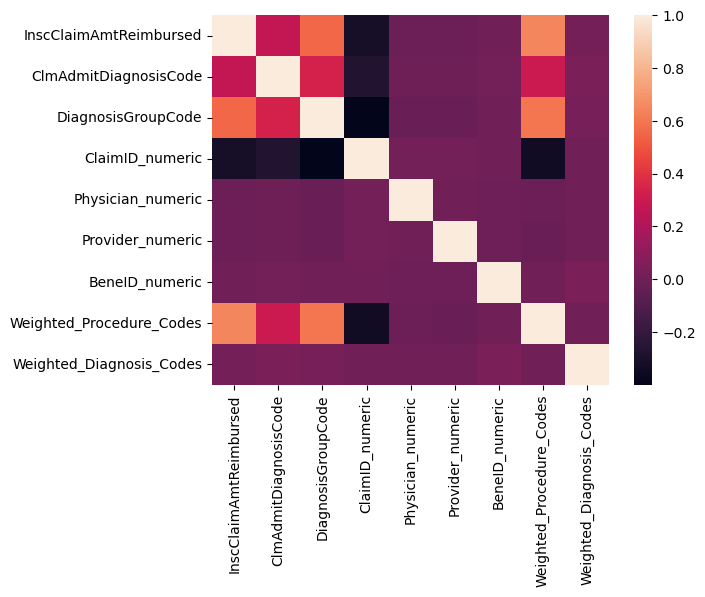

In [366]:
sns.heatmap(matrix)

In [367]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming final_df is your DataFrame
X = total_test.drop('InscClaimAmtReimbursed', axis=1)
X = total_test.drop('ClaimID_numeric', axis=1)


y = total_test['InscClaimAmtReimbursed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1377036.025130211
R^2 Score: 0.9023989136645296


In [368]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X_train = total_df.drop('InscClaimAmtReimbursed', axis=1)
X_train = total_df.drop('ClaimID_numeric', axis=1)

y_train = total_df['InscClaimAmtReimbursed']

X_test = total_test.drop('InscClaimAmtReimbursed', axis=1)
X_test = total_test.drop('ClaimID_numeric', axis=1)

y_test = total_test['InscClaimAmtReimbursed']

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.940394758052463


In [369]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Initialize the models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression()
}

# Loop through each model, fit, predict, and evaluate
for name, model in models.items():
    print("Training", name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R^2 Score: {r2}")


Training Random Forest
Random Forest - MSE: 300.31645449448104, R^2 Score: 0.999978747651697
Training Gradient Boosting
Gradient Boosting - MSE: 252.4142406707561, R^2 Score: 0.9999821375243377
Training Linear Regression
Linear Regression - MSE: 8.579010004582081e-23, R^2 Score: 1.0
